In [10]:
# Importing Data
data = '../input/mit-bih-arrhythmia-database/'

In [11]:
pip install wfdb

Note: you may need to restart the kernel to use updated packages.


In [12]:
#View the standard WFDB annotation labels
import wfdb
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [13]:
# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
normal = ['N']

In [14]:
# According to AAMI
dic = {'N':['N','L','R','B'],
       'S':['A','a','j','S','e','j','n'],
       'V':['V','r','E'],
       'F':['F'],
       'Q':['Q','?','f','/'],
      }

In [15]:
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import wfdb 

***Extract Heartbeats from ECG signals***

******Extract one ECG signals******

In [19]:
# changing the window size 
import wfdb
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

record = wfdb.rdrecord(data+'100',smooth_frames=True)
l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
print(record.__dict__)

{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}


In [21]:
patient_number = record.record_name
leads = record.sig_name
ecg_data = record.p_signal

In [22]:
ecg_data.shape

(650000, 2)

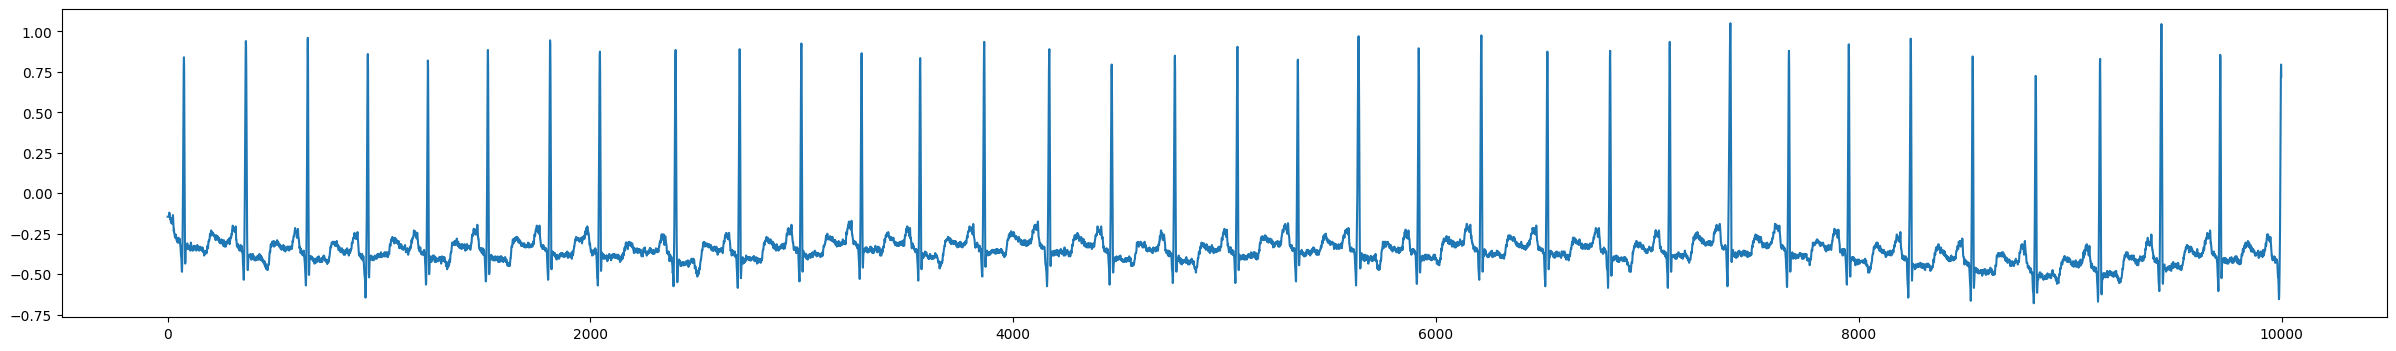

In [23]:
plt.figure(figsize=(30, 4))
plt.plot(record.p_signal[:10000,0])
plt.savefig('ecg.png', format='png', dpi=400)

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))

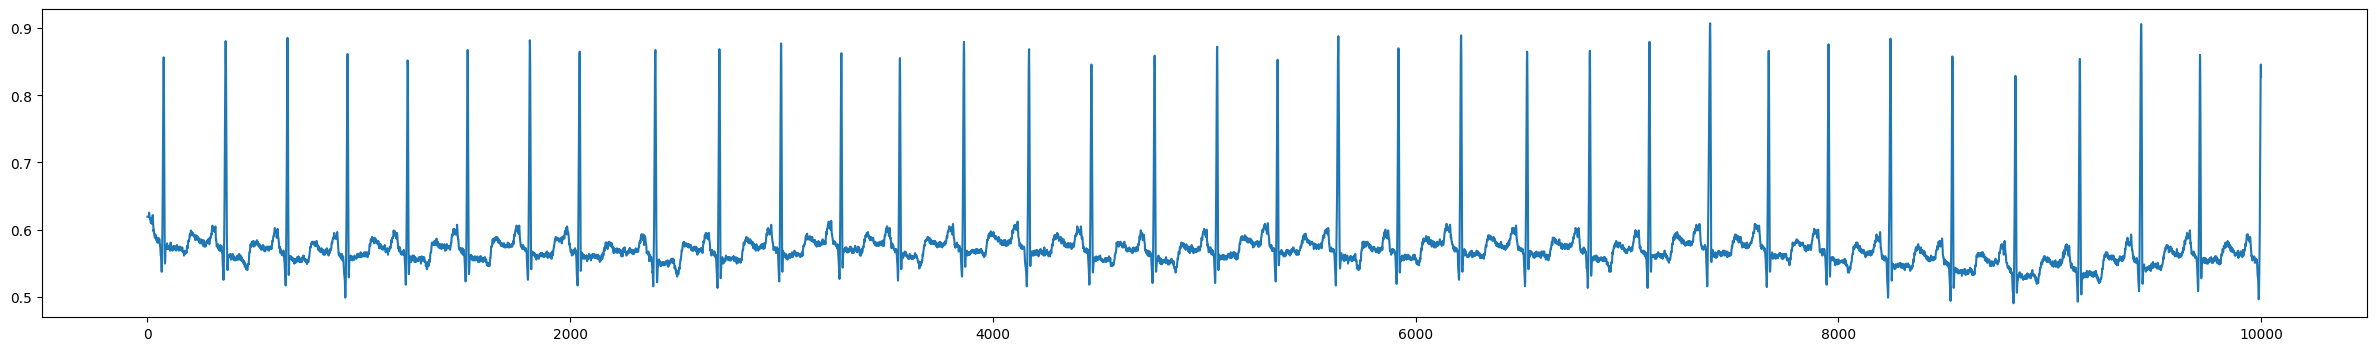

In [25]:
plt.figure(figsize=(30, 4))
plt.plot(lm[:10000])
plt.savefig('ecg_scaled.png', format='png', dpi=400)

In [26]:
# changing the window size 
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

fs = 360
insize = 180

y = []
beat_l2 = []


for num in patients:
    print('record number',num)
    record = wfdb.rdrecord(data+num,smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
    
    qrs = processing.XQRS(sig = l2,fs = fs)
    qrs.detect()
    peaks = qrs.qrs_inds
      
    
    for peak in peaks[1:-1]:
        start,end = peak-insize//2, peak+insize//2
        ann = wfdb.rdann(data+num,extension='atr', sampfrom = start, sampto = end, 
                         return_label_elements=['symbol'])
        annsymbol =ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl)
                    beat_l2.append(l2[start:end])
                    

record number 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 105
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

In [27]:
z= []
for i in range(len(beat_l2)):
    if len(beat_l2[i])!=180:
        z.append(i)
print(z)

[]


In [28]:
df = pd.DataFrame(beat_l2)
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.006723,-0.019156,0.032603,0.006723,0.084363,0.032603,0.032603,0.006723,0.006723,0.084363,...,-0.588516,-0.536756,-0.562636,-0.614396,-0.588516,-0.666156,-0.640276,-0.640276,-0.588516,-0.640276
1,-0.122676,-0.200316,-0.200316,-0.252076,-0.226196,-0.174436,-0.122676,-0.174436,-0.174436,-0.174436,...,-0.484996,-0.562636,-0.510876,-0.510876,-0.536756,-0.562636,-0.588516,-0.588516,-0.614396,-0.562636
2,-0.355596,-0.407356,-0.252076,-0.277956,-0.252076,-0.277956,-0.277956,-0.329716,-0.277956,-0.200316,...,-0.303836,-0.329716,-0.355596,-0.407356,-0.433236,-0.433236,-0.355596,-0.303836,-0.407356,-0.381476
3,-0.200316,-0.200316,-0.226196,-0.252076,-0.200316,-0.122676,-0.122676,-0.148556,-0.148556,-0.174436,...,-0.510876,-0.614396,-0.614396,-0.614396,-0.588516,-0.614396,-0.743796,-0.717916,-0.743796,-0.666156
4,-0.174436,-0.174436,-0.174436,-0.096796,-0.096796,-0.096796,-0.200316,-0.226196,-0.174436,-0.122676,...,-0.484996,-0.459116,-0.459116,-0.510876,-0.536756,-0.614396,-0.614396,-0.536756,-0.536756,-0.588516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107770,-0.293947,-0.308763,-0.323578,-0.308763,-0.323578,-0.353210,-0.353210,-0.323578,-0.323578,-0.264315,...,-0.323578,-0.353210,-0.323578,-0.353210,-0.382842,-0.323578,-0.293947,-0.249499,-0.249499,-0.249499
107771,-0.086526,-0.086526,-0.101341,-0.145789,-0.175420,-0.145789,-0.160605,-0.086526,-0.086526,-0.086526,...,-0.130973,-0.160605,-0.145789,-0.160605,-0.160605,-0.160605,-0.190236,-0.056894,-0.101341,-0.116157
107772,-0.219868,-0.219868,-0.219868,-0.205052,-0.205052,-0.190236,-0.145789,-0.116157,-0.101341,-0.130973,...,-0.516184,-0.471736,-0.382842,-0.368026,-0.323578,-0.323578,-0.338394,-0.308763,-0.323578,-0.293947
107773,-0.338394,-0.323578,-0.323578,-0.308763,-0.308763,-0.323578,-0.264315,-0.249499,-0.264315,-0.264315,...,-0.308763,-0.338394,-0.308763,-0.323578,-0.293947,-0.279131,-0.279131,-0.293947,-0.308763,-0.368026


In [29]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

le = LabelEncoder()
y_no = le.fit_transform(y)

print(Counter(y))
print(Counter(y_no))

Counter({'N': 89694, 'Q': 8001, 'V': 6487, 'S': 2814, 'F': 779})
Counter({1: 89694, 2: 8001, 4: 6487, 3: 2814, 0: 779})


In [30]:
df['target']=y_no
df


,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,target
0,0.006723,-0.019156,0.032603,0.006723,0.084363,0.032603,0.032603,0.006723,0.006723,0.084363,...,-0.536756,-0.562636,-0.614396,-0.588516,-0.666156,-0.640276,-0.640276,-0.588516,-0.640276,1
1,-0.122676,-0.200316,-0.200316,-0.252076,-0.226196,-0.174436,-0.122676,-0.174436,-0.174436,-0.174436,...,-0.562636,-0.510876,-0.510876,-0.536756,-0.562636,-0.588516,-0.588516,-0.614396,-0.562636,1
2,-0.355596,-0.407356,-0.252076,-0.277956,-0.252076,-0.277956,-0.277956,-0.329716,-0.277956,-0.200316,...,-0.329716,-0.355596,-0.407356,-0.433236,-0.433236,-0.355596,-0.303836,-0.407356,-0.381476,1
3,-0.200316,-0.200316,-0.226196,-0.252076,-0.200316,-0.122676,-0.122676,-0.148556,-0.148556,-0.174436,...,-0.614396,-0.614396,-0.614396,-0.588516,-0.614396,-0.743796,-0.717916,-0.743796,-0.666156,1
4,-0.174436,-0.174436,-0.174436,-0.096796,-0.096796,-0.096796,-0.200316,-0.226196,-0.174436,-0.122676,...,-0.459116,-0.459116,-0.510876,-0.536756,-0.614396,-0.614396,-0.536756,-0.536756,-0.588516,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107770,-0.293947,-0.308763,-0.323578,-0.308763,-0.323578,-0.353210,-0.353210,-0.323578,-0.323578,-0.264315,...,-0.353210,-0.323578,-0.353210,-0.382842,-0.323578,-0.293947,-0.249499,-0.249499,-0.249499,1
107771,-0.086526,-0.086526,-0.101341,-0.145789,-0.175420,-0.145789,-0.160605,-0.086526,-0.086526,-0.086526,...,-0.160605,-0.145789,-0.160605,-0.160605,-0.160605,-0.190236,-0.056894,-0.101341,-0.116157,1
107772,-0.219868,-0.219868,-0.219868,-0.205052,-0.205052,-0.190236,-0.145789,-0.116157,-0.101341,-0.130973,...,-0.471736,-0.382842,-0.368026,-0.323578,-0.323578,-0.338394,-0.308763,-0.323578,-0.293947,1
107773,-0.338394,-0.323578,-0.323578,-0.308763,-0.308763,-0.323578,-0.264315,-0.249499,-0.264315,-0.264315,...,-0.338394,-0.308763,-0.323578,-0.293947,-0.279131,-0.279131,-0.293947,-0.308763,-0.368026,1


In [31]:
df.to_csv('MIT-BIH.csv')